<a href="https://colab.research.google.com/github/Manasipotade/Dublin-housing-price-analysis/blob/main/Dublin_housing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
from google.colab import drive
drive.mount('/gdrive')
%cd /gdrive

Mounted at /gdrive
/gdrive


In [ ]:
file_path = '/gdrive/MyDrive/Data/housing_data.csv'

In [ ]:
df = pd.read_csv(file_path)

<ipython-input-4-47c250c455f0>:1: DtypeWarning: Columns (8) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


In [ ]:
df.head()

,Date of Sale,Address,County,Eircode,Price,Not Full Market Price,VAT Exclusive,Description of Property,Property Size Description
0,01/01/2010,"5 Braemor Drive, Churchtown, Co.Dublin",Dublin,NaN,"€343,000.00",No,No,Second-Hand Dwelling house /Apartment,NaN
1,03/01/2010,"134 Ashewood Walk, Summerhill Lane, Portlaoise",Laois,NaN,"€185,000.00",No,Yes,New Dwelling house /Apartment,greater than or equal to 38 sq metres and less...
2,04/01/2010,"1 Meadow Avenue, Dundrum, Dublin 14",Dublin,NaN,"€438,500.00",No,No,Second-Hand Dwelling house /Apartment,NaN
3,04/01/2010,"1 The Haven, Mornington",Meath,NaN,"€400,000.00",No,No,Second-Hand Dwelling house /Apartment,NaN
4,04/01/2010,"11 Melville Heights, Kilkenny",Kilkenny,NaN,"€160,000.00",No,No,Second-Hand Dwelling house /Apartment,NaN


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 674687 entries, 0 to 674686
Data columns (total 9 columns):
 #   Column                     Non-Null Count   Dtype 
---  ------                     --------------   ----- 
 0   Date of Sale               674687 non-null  object
 1   Address                    674687 non-null  object
 2   County                     674687 non-null  object
 3   Eircode                    151072 non-null  object
 4   Price                      674687 non-null  object
 5   Not Full Market Price      674687 non-null  object
 6   VAT Exclusive              674687 non-null  object
 7   Description of Property    674687 non-null  object
 8   Property Size Description  52829 non-null   object
dtypes: object(9)
memory usage: 46.3+ MB


In [ ]:
df.describe()

,Date of Sale,Address,County,Eircode,Price,Not Full Market Price,VAT Exclusive,Description of Property,Property Size Description
count,674687,674687,674687,151072,674687,674687,674687,674687,52829
unique,5037,606250,26,146704,38361,2,2,5,6
top,22/12/2014,"Broomfield, Midleton",Dublin,D24W9NN,"€150,000.00",No,No,Second-Hand Dwelling house /Apartment,greater than or equal to 38 sq metres and less...
freq,1542,21,211323,34,8159,640967,563198,561063,38095


In [ ]:
df.shape

(674687, 9)

In [ ]:
df.columns

Index(['Date of Sale', 'Address', 'County', 'Eircode', 'Price',
       'Not Full Market Price', 'VAT Exclusive', 'Description of Property',
       'Property Size Description'],
      dtype='object')

# Data Cleaning

In [ ]:
df.isna().sum()

,0
Date of Sale,0
Address,0
County,0
Eircode,523615
Price,0
Not Full Market Price,0
VAT Exclusive,0
Description of Property,0
Property Size Description,621858


In [ ]:
df.drop(columns=['Eircode','Property Size Description'],inplace=True)

### Removing Duplicates

In [ ]:
df.drop_duplicates(inplace=True)

In [ ]:
df.shape

(673743, 7)

### Correcting Data Types

In [ ]:
# Convert the 'Date of Sale (dd/mm/yyyy)' to datetime format
df['Date of Sale'] = pd.to_datetime(df['Date of Sale'], format='%d/%m/%Y')
df['Price'] = df['Price'].replace({'[€]': '', ',': ''}, regex=True).astype(float)
# df = df.set_index('Date of Sale')

### Replacing column value

In [ ]:
df['Description of Property'] = df['Description of Property'].replace({
    'Teach/Árasán Cónaithe Nua': 'New Dwelling house /Apartment',
    'Teach/?ras?n C?naithe Nua': 'New Dwelling house /Apartment',
    'Teach/Árasán Cónaithe Atháimhe': 'Second-Hand Dwelling house /Apartment'
})

### Capping Outliers

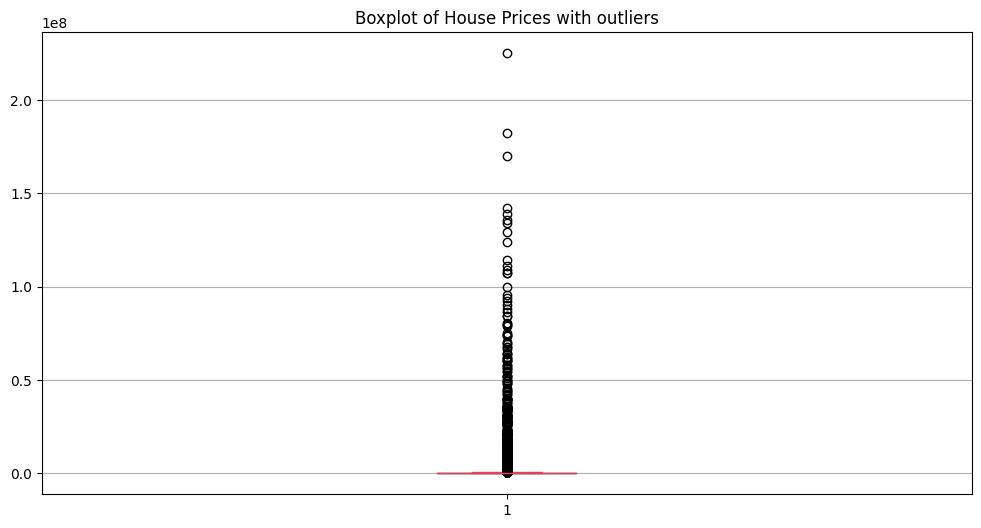

In [ ]:
plt.figure(figsize=(12, 6))
bp = plt.boxplot(df['Price'], patch_artist=True)
for box in bp['boxes']:
    box.set(facecolor='#2f4b7c')
for element in ['whiskers', 'fliers', 'means', 'medians', 'caps']:
    plt.setp(bp[element], color='#de425b')
plt.title('Boxplot of House Prices with outliers')
plt.grid(axis='y')
plt.show()

In [ ]:
upper_limit = df['Price'].quantile(0.99)
lower_limit = df['Price'].quantile(0.01)
# df['Price'] = np.where(df['Price'] > upper_limit, upper_limit, df['Price'])

In [ ]:
df = df[(df['Price'] > lower_limit) & (df['Price'] < upper_limit)]

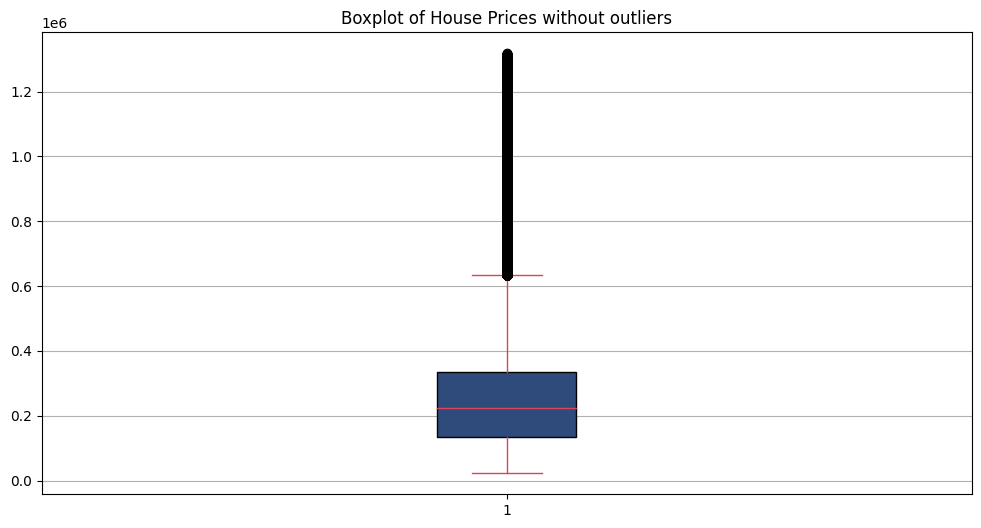

In [ ]:
plt.figure(figsize=(12, 6))
bp = plt.boxplot(df['Price'], patch_artist=True)
for box in bp['boxes']:
    box.set(facecolor='#2f4b7c')
for element in ['whiskers', 'fliers', 'means', 'medians', 'caps']:
    plt.setp(bp[element], color='#de425b')
plt.title('Boxplot of House Prices without outliers')
plt.grid(axis='y')
plt.show()

In [ ]:
# Extract the year and month from 'Date of Sale'
df['Year'] = df['Date of Sale'].dt.year
df['Month'] = df['Date of Sale'].dt.month

In [ ]:
df.shape

(660231, 9)

# EDA

## Housing Price Trend in Ireland

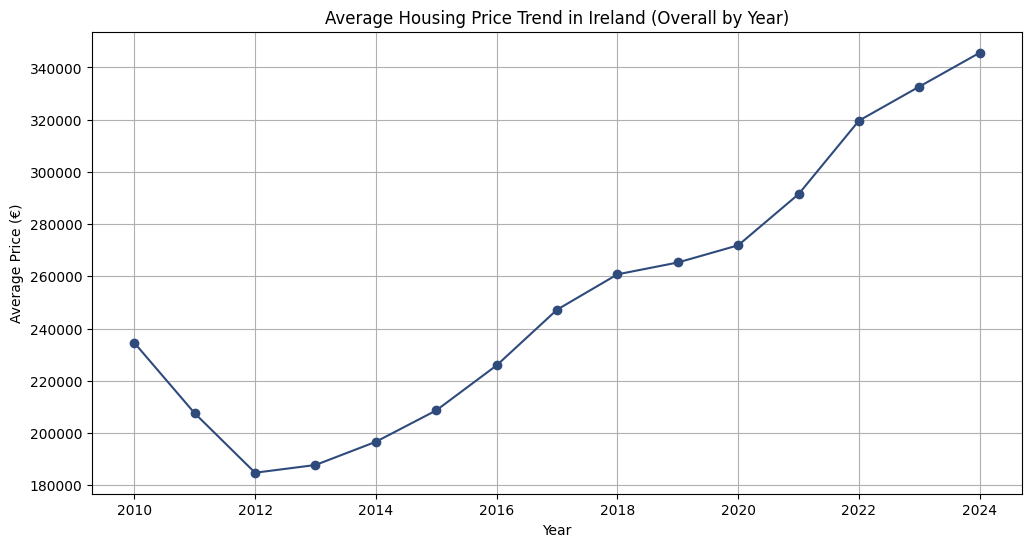

In [ ]:
# Grouping the data by year and calculating the average price per year across all counties
avg_price_overall_by_year = df.groupby('Year')['Price'].mean()
plt.figure(figsize=(12, 6))
avg_price_overall_by_year.plot(marker='o', linestyle='-', color=['#2f4b7c'])
plt.title('Average Housing Price Trend in Ireland (Overall by Year)')
plt.ylabel('Average Price (€)')
plt.xlabel('Year')
plt.grid(True)
plt.show()


## County-wise Average Prices:

* Dublin has the highest average housing price at approximately €461,785, followed by Wicklow (€368,188) and Kildare (€306,949).
* The lower end of the county prices includes regions like Leitrim and Longford, which are more affordable.

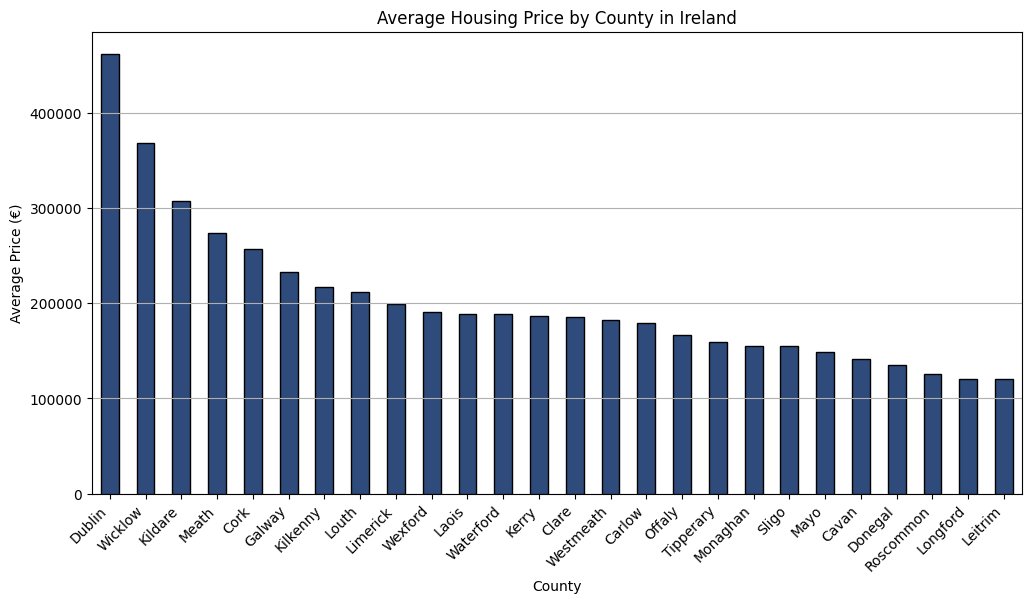

In [ ]:
avg_price_by_county = df.groupby('County')['Price'].mean().sort_values(ascending=False)
plt.figure(figsize=(12, 6))
avg_price_by_county.plot(kind='bar', color=['#2f4b7c'], edgecolor='black')
plt.title('Average Housing Price by County in Ireland')
plt.ylabel('Average Price (€)')
plt.xlabel('County')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y')
plt.show()

## Average Housing Price Trends in Ireland


The visualization illustrates the average housing price trends by year for various counties in Ireland. Here are some key takeaways:

* Dublin consistently shows the highest average prices, reflecting its status as the capital and economic hub.
* Counties like Wicklow and Kildare also display relatively high average prices, likely due to their proximity to Dublin.
* Other counties exhibit a range of trends, with some experiencing more volatility and others showing steadier growth or decline over time.




<Figure size 1200x600 with 0 Axes>

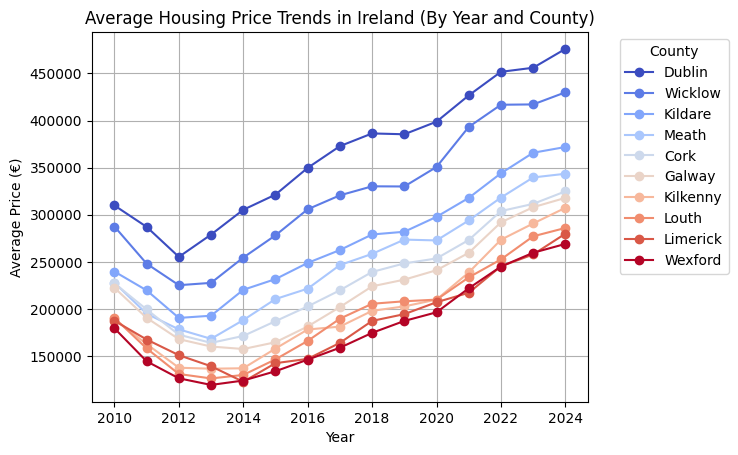

In [ ]:
# Grouping the data by year and county and calculating the average price per year per county
avg_price_by_year_county = df.groupby(['Year', 'County'])['Price'].mean().unstack()
top_10_counties = avg_price_by_year_county.mean().nlargest(10).index
avg_price_by_year_county = avg_price_by_year_county[top_10_counties]

plt.figure(figsize=(12, 6))
avg_price_by_year_county.plot(marker='o', linestyle='-', colormap= 'coolwarm')
plt.title('Average Housing Price Trends in Ireland (By Year and County)')
plt.ylabel('Average Price (€)')
plt.xlabel('Year')
plt.legend(title='County', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.show()

## Average Housing Prices: New vs. Second-Hand Properties

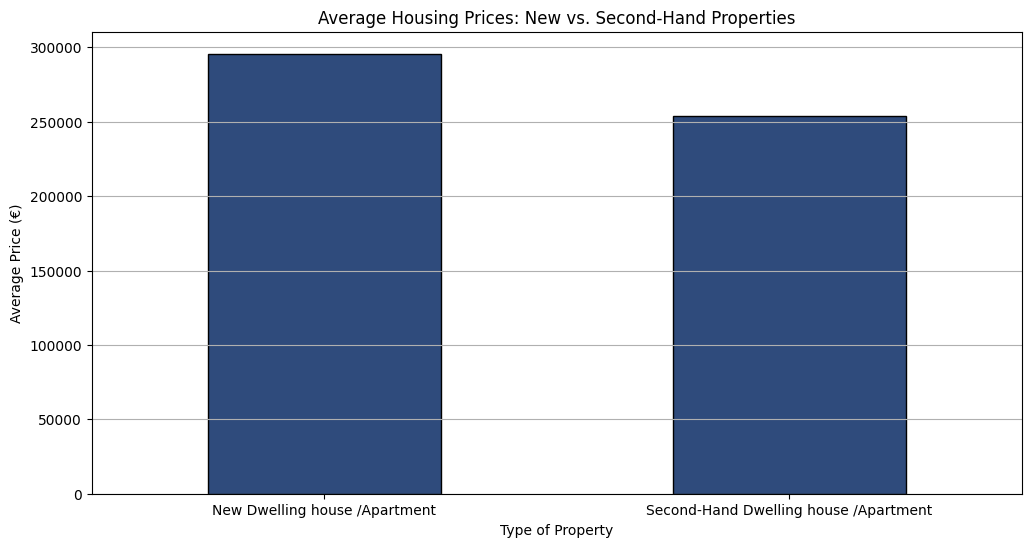

In [ ]:
new_vs_secondhand_prices = df.groupby('Description of Property')['Price'].mean()
plt.figure(figsize=(12, 6))
new_vs_secondhand_prices.plot(kind='bar', color=['#2f4b7c'], edgecolor='black')
plt.title('Average Housing Prices: New vs. Second-Hand Properties')
plt.xlabel('Type of Property')
plt.ylabel('Average Price (€)')
plt.grid(axis='y')
plt.xticks(rotation=0)
plt.show()

## Housing Prices by Month for new houses/apartment

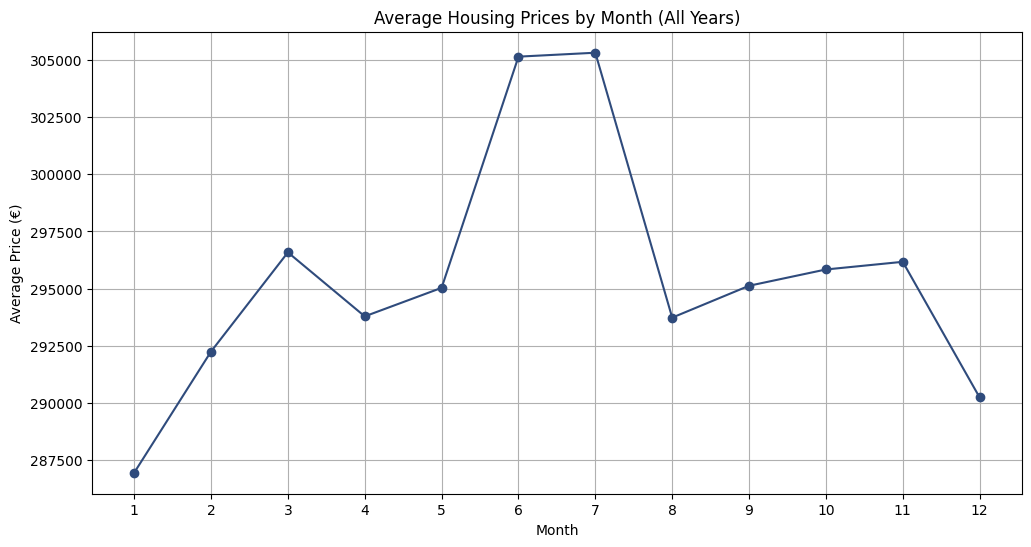

In [ ]:
df_new = df[df['Description of Property']== 'New Dwelling house /Apartment']
avg_price_by_month = df_new.groupby('Month')['Price'].mean()
plt.figure(figsize=(12, 6))
avg_price_by_month.plot(marker='o', linestyle='-', color=['#2f4b7c'])
plt.title('Average Housing Prices by Month (All Years)')
plt.ylabel('Average Price (€)')
plt.xlabel('Month')
plt.grid(True)
plt.xticks(range(1, 13))
plt.show()


## Housing Prices by Property Type and County in Ireland

<Figure size 1200x800 with 0 Axes>

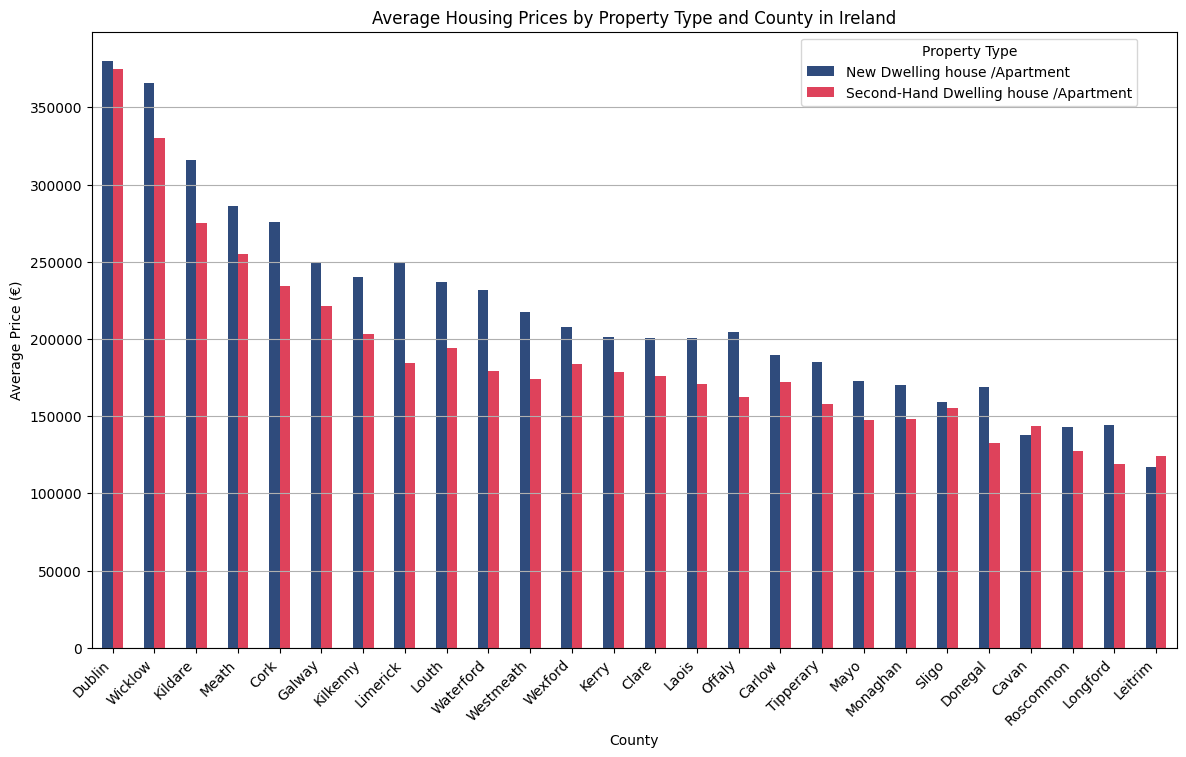

In [ ]:
# Group by 'Description of Property' and 'County', calculate mean, then unstack
price_by_type = df.groupby(['Description of Property', 'County'])['Price'].mean().unstack()

# Sort by the sum of prices for each county
price_by_type = price_by_type.reindex(columns=sorted(price_by_type.columns, key=lambda x: price_by_type[x].sum(), reverse=True))
# Plot the sorted DataFrame
plt.figure(figsize=(12, 8))
price_by_type.T.plot(kind='bar', figsize=(14, 8), color=['#2f4b7c', '#de425b'])
plt.title('Average Housing Prices by Property Type and County in Ireland')
plt.xlabel('County')
plt.ylabel('Average Price (€)')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Property Type', bbox_to_anchor=(0.97, 1))
plt.grid(axis='y')
plt.show()

## Housing prices before the Covid period

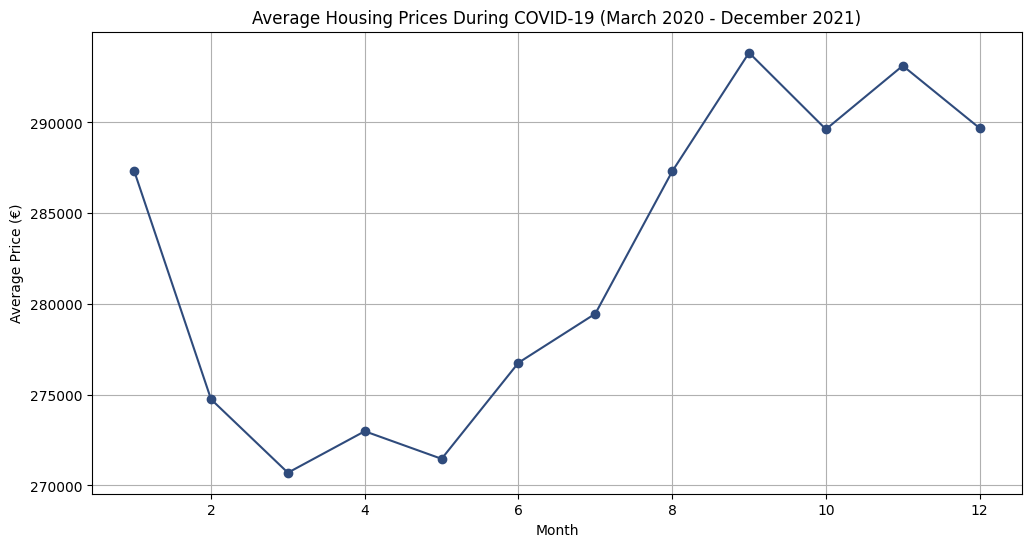

In [ ]:
# Define the pre-COVID and post-COVID periods
pre_covid_period = df[df['Date of Sale'] < '2020-03-01']
post_covid_period = df[df['Date of Sale'] >= '2020-03-01']

# Calculate the average prices for pre-COVID and post-COVID periods
avg_price_pre_covid = pre_covid_period['Price'].mean()
avg_price_post_covid = post_covid_period['Price'].mean()

# Calculate the overall price trends during the COVID period (2020-2021)
covid_period_data = df[(df['Date of Sale'] >= '2020-03-01') & (df['Date of Sale'] <= '2021-12-31')]
avg_price_during_covid = covid_period_data.groupby('Month')['Price'].mean()

plt.figure(figsize=(12, 6))
avg_price_during_covid.plot(marker='o', linestyle='-', color=['#2f4b7c'])
plt.title('Average Housing Prices During COVID-19 (March 2020 - December 2021)')
plt.ylabel('Average Price (€)')
plt.xlabel('Month')
plt.grid(True)
plt.show()


## Housing prices during the Covid period

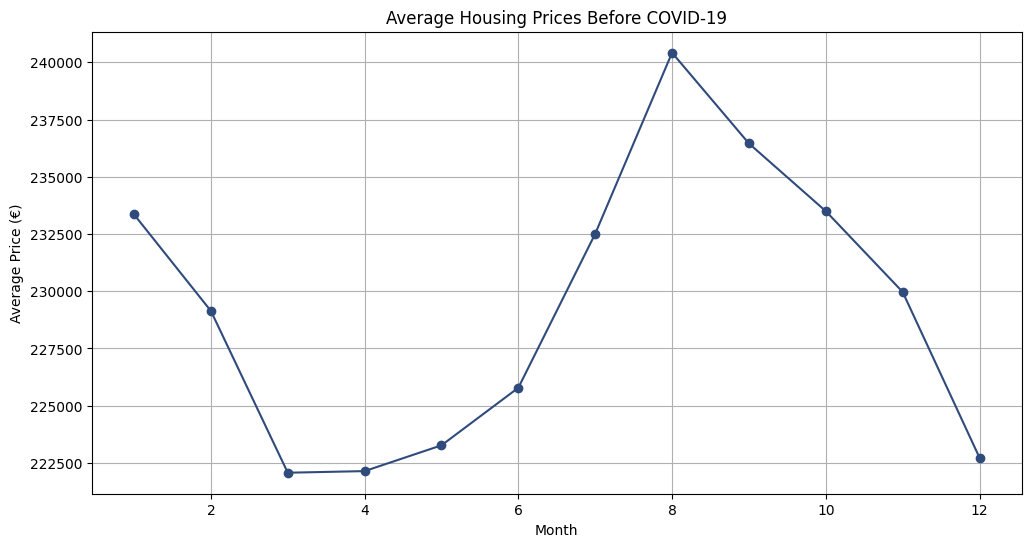

In [ ]:
pre_covid_period_data = df[(df['Date of Sale'] <= '2020-03-01')]
avg_price_pre_covid = pre_covid_period_data.groupby('Month')['Price'].mean()
# Visualize the trend of average prices during the COVID period
plt.figure(figsize=(12, 6))
avg_price_pre_covid.plot(marker='o', linestyle='-', color=['#2f4b7c'])
plt.title('Average Housing Prices Before COVID-19')
plt.ylabel('Average Price (€)')
plt.xlabel('Month')
plt.grid(True)
plt.show()


## Average Housing Price Trends in Ireland Post Covid

* Dublin and Surrounding Counties: Consistently show higher prices, with a noticeable upward trend during this period.
* Regional Variations: While most counties experienced price increases, the rate of growth varies significantly across regions. Some counties saw sharper rises, indicating hotspots in the market.

<Figure size 1200x600 with 0 Axes>

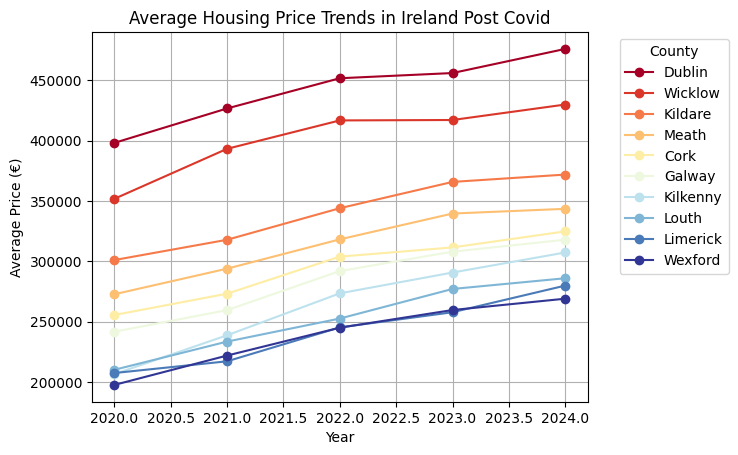

In [ ]:
# Grouping the data by year and county and calculating the average price per year per county
avg_price_by_year_county = post_covid_period.groupby(['Year', 'County'])['Price'].mean().unstack()
top_10_counties = avg_price_by_year_county.mean().nlargest(10).index
avg_price_by_year_county = avg_price_by_year_county[top_10_counties]
plt.figure(figsize=(12, 6))
avg_price_by_year_county.plot(marker='o', linestyle='-', colormap='RdYlBu')
plt.title('Average Housing Price Trends in Ireland Post Covid')
plt.ylabel('Average Price (€)')
plt.xlabel('Year')
plt.legend(title='County', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.show()

## HTB

<Figure size 1200x600 with 0 Axes>

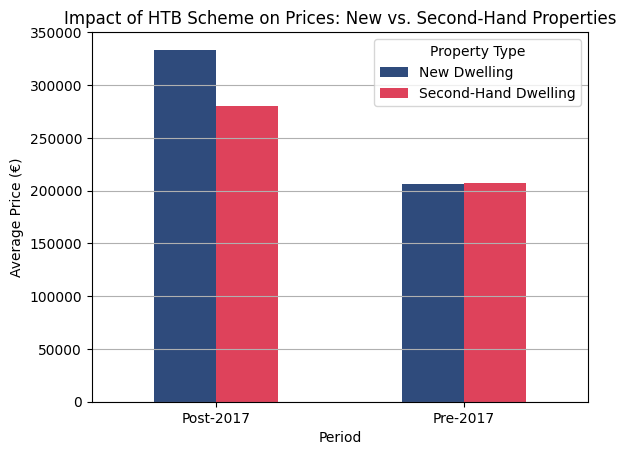

In [ ]:
new_houses = df[df['Description of Property'] == 'New Dwelling house /Apartment']
second_hand_houses = df[df['Description of Property'] == 'Second-Hand Dwelling house /Apartment']

# Split the data into pre- and post-2017 periods for both new and second-hand properties
pre_2017_new = new_houses[new_houses['Year'] < 2017]
post_2017_new = new_houses[new_houses['Year'] >= 2017]

pre_2017_second_hand = second_hand_houses[second_hand_houses['Year'] < 2017]
post_2017_second_hand = second_hand_houses[second_hand_houses['Year'] >= 2017]

avg_price_pre_2017_new = pre_2017_new['Price'].mean()
avg_price_post_2017_new = post_2017_new['Price'].mean()

avg_price_pre_2017_second_hand = pre_2017_second_hand['Price'].mean()
avg_price_post_2017_second_hand = post_2017_second_hand['Price'].mean()

price_comparison = pd.DataFrame({
    'Property Type': ['New Dwelling', 'New Dwelling', 'Second-Hand Dwelling', 'Second-Hand Dwelling'],
    'Period': ['Pre-2017', 'Post-2017', 'Pre-2017', 'Post-2017'],
    'Average Price (€)': [avg_price_pre_2017_new, avg_price_post_2017_new, avg_price_pre_2017_second_hand, avg_price_post_2017_second_hand]})

plt.figure(figsize=(12, 6))
price_comparison.pivot(index = "Period", columns = "Property Type", values = "Average Price (€)").plot(kind='bar', color=['#2f4b7c', '#de425b'])
plt.title('Impact of HTB Scheme on Prices: New vs. Second-Hand Properties')
plt.ylabel('Average Price (€)')
plt.xlabel('Period')
plt.grid(axis='y')
plt.xticks(rotation=0)
plt.show()

## Average Housing Prices for New Property by County and Sale Type (Full Market vs. Not Full Market)

<Figure size 1400x800 with 0 Axes>

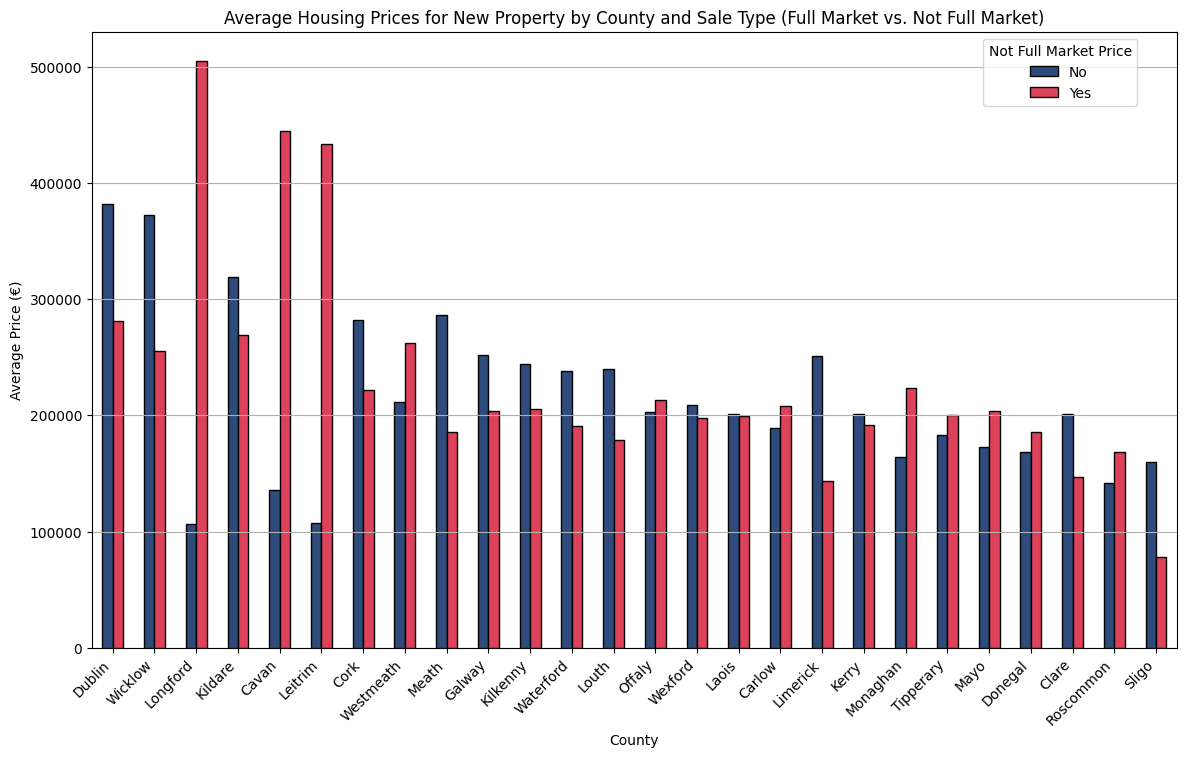

In [ ]:
new_houses = df[df['Description of Property'] == 'New Dwelling house /Apartment']
avg_price_by_county_and_sale_type = new_houses.groupby(['County', 'Not Full Market Price'])['Price'].mean().unstack()

avg_price_by_county_and_sale_type = avg_price_by_county_and_sale_type.reindex(
    index=avg_price_by_county_and_sale_type.sum(axis=1).sort_values(ascending=False).index)
plt.figure(figsize=(14, 8))
avg_price_by_county_and_sale_type.plot(kind='bar', figsize=(14, 8), color=['#2f4b7c', '#de425b'], edgecolor='black')
plt.title('Average Housing Prices for New Property by County and Sale Type (Full Market vs. Not Full Market)')
plt.xlabel('County')
plt.ylabel('Average Price (€)')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Not Full Market Price', bbox_to_anchor=(0.97, 1))
plt.grid(axis='y')
plt.show()


## Year-Over-Year Difference in Average Housing Prices in Ireland

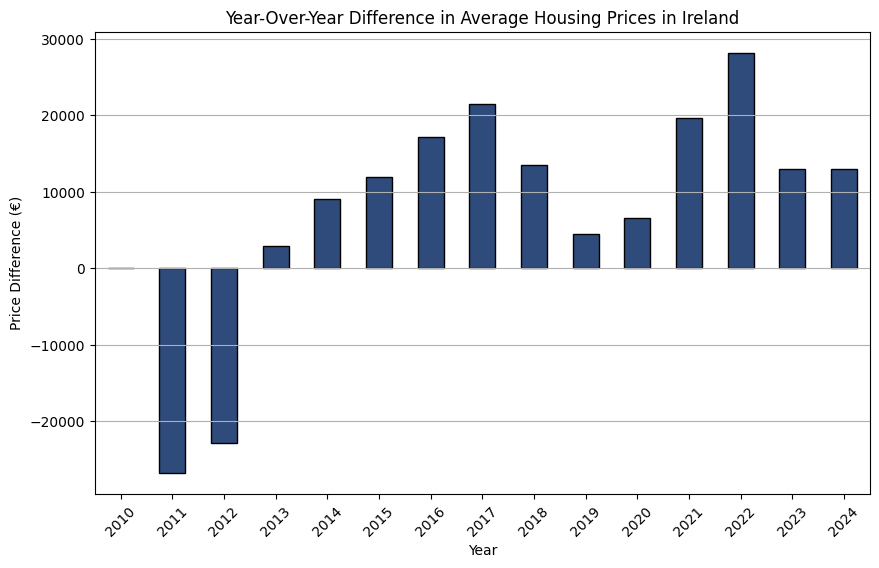

In [ ]:
# Calculate the average price per year
average_price_per_year = df.groupby(df['Date of Sale'].dt.year)['Price'].mean()

# Calculate the year-over-year difference in average prices
price_difference_per_year = average_price_per_year.diff().fillna(0)  # Fill NaN for the first year with 0

plt.figure(figsize=(10, 6))
price_difference_per_year.plot(kind='bar', color='#2f4b7c',edgecolor='black')
plt.title('Year-Over-Year Difference in Average Housing Prices in Ireland')
plt.xlabel('Year')
plt.ylabel('Price Difference (€)')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()
